In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os
os.chdir("F:/Machine Learning/Imarticus LMS/Linear Regression/Dataset")

In [3]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data=data.drop(["Id","FireplaceQu"],axis=1)

# Deleting FireplaceQu Because it was giving Problems while predicting : test.csv

## 1. Pre Processing

In [5]:
data.shape

(1460, 79)

In [77]:
data.SalePrice.describe(percentiles=[.25, .5, .75 , .85 , .90 , .95 , .99])

# Only 5% have price > 326100.000000
# Only 1% have price > 442567.010000

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
85%      250000.000000
90%      278000.000000
95%      326100.000000
99%      442567.010000
max      755000.000000
Name: SalePrice, dtype: float64

In [78]:
data.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,3.028767,69.863699,10516.828082,0.995890,1.942466,2.777397,0.000685,3.019178,0.062329,...,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,7.513014,3.770548,180921.195890
std,42.300571,0.632017,22.027677,9981.264932,0.063996,1.409156,0.707666,0.026171,1.622634,0.276232,...,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,1.552100,1.100854,79442.502883
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,20.000000,3.000000,60.000000,7553.500000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,129975.000000
50%,50.000000,3.000000,69.000000,9478.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163000.000000
75%,70.000000,3.000000,79.000000,11601.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,214000.000000
max,190.000000,4.000000,313.000000,215245.000000,1.000000,3.000000,3.000000,1.000000,4.000000,2.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

---

### 1.1 Checking Null Values

In [8]:
Nulls = pd.DataFrame()
Nulls["Missing_records"] = (data.isna().sum().sort_values(ascending=False))
Nulls["Missing %"] = ((data.isna().sum() / data.shape[0])).sort_values(ascending=False)
Nulls = Nulls[Nulls["Missing_records"]>0]
Nulls.head(25)

,Missing_records,Missing %
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageQual,81,0.055479
GarageCond,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


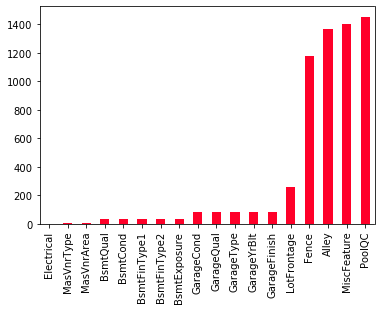

In [9]:
Null = data.isna().sum()
Null = Null[Null > 0]
Null.sort_values(inplace=True)
Null.plot.bar(cmap='gist_rainbow')

### 1.2 Missing Data  Treatment  (Drop/Impute)

- PoolQC,MiscFeature,Alley,Fence,FireplaceQu : They have more then 50% of the Data Missing, so we Drop them.
- i.e if more than 690 Records Missing, we Drop them.



- **We Use Median to Impute Numeric Data**
- **We Use Mode to Impute Categorical Data**

In [10]:
# Delete All columns from data where Missing Data is more than around 20% i.e 260 Missing records
for i in range(0,Nulls.shape[0]):
    if Nulls["Missing_records"][i] > 690 :
        data.drop([Nulls.index[i]],inplace=True,axis=1)
                
        
# Make 2 different Lists For numeric and categorical Data, which will have only Column names and no data.
# Few columns are deleted in above step, so those wont be included
numeric_cols = data.select_dtypes(include=["int64","float"]).columns
cat_cols = data.select_dtypes(include="object").columns

num_nulls = [] # Numeric columns which have nulls
cat_nulls = [] # Categorical columns which have nulls
for i in Nulls.index:
    if i in numeric_cols:
        num_nulls.append(i)
    elif i in cat_cols:
        cat_nulls.append(i)

        
print("Now we have Nulls in the following Numeric Columns : \n ",num_nulls) 
print("\n")
print("Now we have Nulls in the following Categoric Columns : \n ",cat_nulls)        

Now we have Nulls in the following Numeric Columns : 
  ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']


Now we have Nulls in the following Categoric Columns : 
  ['GarageType', 'GarageQual', 'GarageCond', 'GarageFinish', 'BsmtExposure', 'BsmtFinType2', 'BsmtCond', 'BsmtFinType1', 'BsmtQual', 'MasVnrType', 'Electrical']


In [11]:
# Impute the Data for Numeric Columns

for i in num_nulls:
    #data.fillna(data[i].median , inplace=True)
    data.fillna(data.median(),inplace=True)

In [12]:
# Impute the Data for Categorical columns
for i in cat_nulls:
    data.fillna(data[i].mode()[0] , inplace=True) 

In [13]:
data.isna().sum().sort_values(ascending=False)

# Now We have No Nulls Left

SalePrice       0
YearRemodAdd    0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
               ..
KitchenAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Functional      0
MSSubClass      0
Length: 75, dtype: int64

---

### 2. Label Encoder to convert all data to Numeric

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data[data.select_dtypes(include="object").columns] = data[data.select_dtypes(include="object").columns].apply(encoder.fit_transform)

---

### 3. EDA

In [15]:
correlation = data.corr().sort_values(by="SalePrice",ascending=False)
correlation["SalePrice"].iloc[1:]

OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
                 ...   
GarageType    -0.302105
HeatingQC     -0.400178
BsmtQual      -0.438881
KitchenQual   -0.589189
ExterQual     -0.636884
Name: SalePrice, Length: 74, dtype: float64

In [16]:
print("Top 10 Feature with +ve Correlation with SalePrice : \n ",(correlation["SalePrice"].iloc[1:11]))
print("="*50,"\n")
print("Top 5 Feature with -ve Correlation with SalePrice : \n ",(correlation["SalePrice"].iloc[-5:-1]))

Top 10 Feature with +ve Correlation with SalePrice : 
  OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

Top 5 Feature with -ve Correlation with SalePrice : 
  GarageType    -0.302105
HeatingQC     -0.400178
BsmtQual      -0.438881
KitchenQual   -0.589189
Name: SalePrice, dtype: float64


- Create sub plots for the 4 below

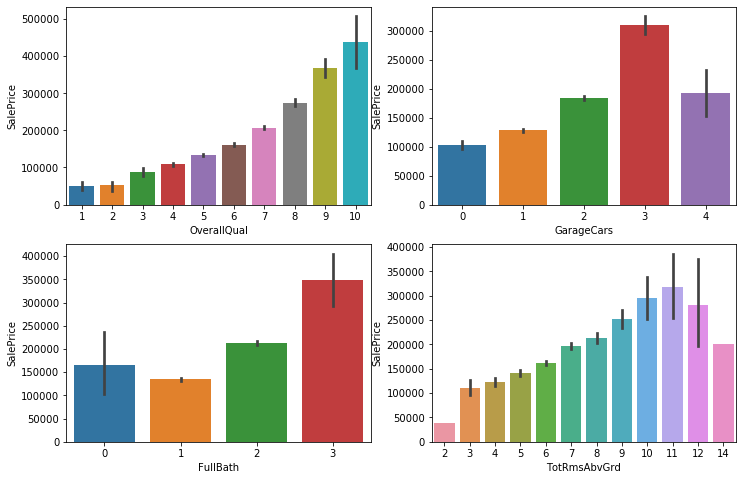

In [17]:
plt.rcParams["figure.figsize"]=12,8

f,axes = plt.subplots(2,2)

p1 = sns.barplot(x=data.OverallQual , y=data.SalePrice,ax=axes[0,0])
p2 = sns.barplot(x=data.GarageCars , y=data.SalePrice ,ax=axes[0,1])
p3 = sns.barplot(x=data.FullBath , y=data.SalePrice ,ax=axes[1,0])
p4 = sns.barplot(x=data.TotRmsAbvGrd , y=data.SalePrice ,ax=axes[1,1])



---

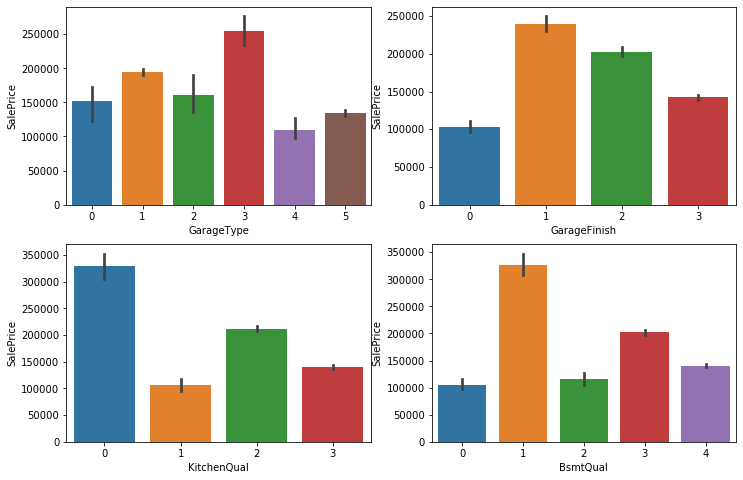

In [18]:
plt.rcParams["figure.figsize"]=12,8
f,axes = plt.subplots(2,2)

p1 = sns.barplot(x=data.GarageType , y=data.SalePrice,ax=axes[0,0])
p2 = sns.barplot(x=data.GarageFinish , y=data.SalePrice ,ax=axes[0,1])
p3 = sns.barplot(x=data.KitchenQual , y=data.SalePrice ,ax=axes[1,0])
p4 = sns.barplot(x=data.BsmtQual , y=data.SalePrice ,ax=axes[1,1])

---

## 4.Sampling

#### 4.1 Using All Features (X_train)

In [19]:
X = data.drop('SalePrice',axis=1) 
y = data.SalePrice

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1168, 74)
(292, 74)
(1168,)
(292,)


#### 4.2 Using IMP Features Only (Features with High Correlation with Y)  (X_trainI)

In [20]:
X = data[["OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF","FullBath","TotRmsAbvGrd","YearBuilt","YearRemodAdd","GarageType","GarageFinish","KitchenQual","BsmtQual"]]
y = data.SalePrice

from sklearn.model_selection import train_test_split

X_trainI,X_testI,y_trainI,y_testI = train_test_split(X,y, test_size=0.2)

print(X_trainI.shape)
print(X_testI.shape)
print(y_trainI.shape)
print(y_testI.shape)

(1168, 14)
(292, 14)
(1168,)
(292,)


### 4.3 Sampling Using RFE  (X_trainRfe)

In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Fit the Model
LR_temp = LinearRegression()
LR_temp.fit(X_train,y_train)

# Call the rfe object, and pass base estimator and number of Important features we want.
rfe = RFE(LR_temp , 20)
rfe.fit(X_train,y_train) # Fit the rfe model

# To select only imp Features from X_train

a= list(rfe.support_)
imp_cols = X_train.columns[a]
print("Important Features as per RFE : \n",imp_cols)

Important Features as per RFE : 
 Index(['Street', 'Utilities', 'LandSlope', 'Condition2', 'BldgType',
       'OverallQual', 'RoofStyle', 'ExterQual', 'BsmtQual', 'BsmtCond',
       'CentralAir', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'PavedDrive'],
      dtype='object')


In [22]:
X = data[imp_cols]
y = data.SalePrice

from sklearn.model_selection import train_test_split

X_trainRfe,X_testRfe,y_trainRfe,y_testRfe = train_test_split(X,y, test_size=0.2)

print(X_trainRfe.shape)
print(X_testRfe.shape)
print(y_trainRfe.shape)
print(y_testRfe.shape)

(1168, 20)
(292, 20)
(1168,)
(292,)


---

In [23]:
# Functio to Calculate Adjusted R-Square
def Adj_Rsquare (model , X_train , y_train):
    RSquare = model.score( X_train, y_train)
    N = X_train.shape[0]
    K = X_train.shape[1]
    Adj_Rsquare_value = 1-((1-RSquare) * (N-1) / (N-K-1))
    return Adj_Rsquare_value

## 5.Modelling

- Using All Feature
- Using Imp Features

### 5.1 Using All Features

In [24]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train,y_train)

print(LR.intercept_)
print("\n")
print(LR.coef_)

y_pred_train = LR.predict(X_train)
y_pred_test  = LR.predict(X_test)

# Calculate Error for Train and Test
error_train = y_train - y_pred_train

error_test  = y_test - y_pred_test

2590823.6748674978


[-8.91769694e+01 -1.17879817e+03 -2.06963081e+02  4.47673941e-01
  4.24273391e+04 -9.72735441e+02  3.41918946e+03 -5.96401569e+04
  2.09137946e+02  8.85255770e+03  4.00426701e+02 -6.15990647e+02
 -1.61650818e+04 -3.33664873e+03 -4.32126045e+02  1.26204840e+04
  3.71960779e+03  2.30926378e+02  8.38814480e+01  2.63549971e+03
  2.65369218e+03 -1.47194068e+03  7.31729064e+02  4.13826352e+03
  2.91803621e+01 -1.01975085e+04 -4.54689998e+01  5.95993790e+02
 -6.92829493e+03  4.20261040e+03 -1.88801246e+03 -5.61326764e+02
  1.29827411e+00  1.67700695e+03  1.09974990e+01 -3.27107914e+00
  9.02469401e+00 -1.12202155e+03 -5.59036709e+02  5.04047290e+03
 -8.88124804e+02  1.12775708e+01  9.03128486e+00  1.68850210e+00
  2.19973578e+01  8.74667669e+03 -6.18349340e+02  4.35999816e+03
 -6.21580536e+01 -2.24907813e+03 -1.37152377e+04 -8.18858259e+03
  4.66806788e+03  4.06165698e+03  3.89021933e+03  5.53293845e+02
 -1.78277771e+02 -2.98072778e+03  1.34053139e+04  8.54216161e+00
 -1.

In [25]:
from sklearn.metrics import mean_squared_error

print("R-Square : ",LR.score(X_train,y_train))
Adj_R2 = Adj_Rsquare(LR,X_train , y_train)
print("Adjusted R-Square : ",Adj_R2)
print("RMSE Train : ",np.sqrt(mean_squared_error(y_train,y_pred_train)))
print("RMSE Test : ",np.sqrt(mean_squared_error(y_test,y_pred_test)))



R-Square :  0.8515642208998899
Adjusted R-Square :  0.8415145890120508
RMSE Train :  30001.169562357598
RMSE Test :  36985.38225202226


---

### 5.2 Using IMP Features Only (Features with High Correlation with Y)

In [26]:
from sklearn.linear_model import LinearRegression

LR1 = LinearRegression()

LR1.fit(X_trainI,y_trainI)

print(LR1.intercept_)
print("\n")
print(LR1.coef_)

y_pred_trainI = LR1.predict(X_trainI)
y_pred_testI  = LR1.predict(X_testI)

# Calculate Error for Train and Test
error_trainI = y_trainI - y_pred_trainI

error_testI  = y_testI - y_pred_testI

-515436.3127583503


[ 1.69273293e+04  4.07141357e+01  1.37603732e+04  1.71526313e+01
  2.64920262e+01 -2.34325616e+00 -6.96054620e+03  2.15168276e+03
  1.13588944e+02  1.55593553e+02 -1.50520118e+03 -3.77263505e+03
 -1.19646230e+04 -7.17371804e+03]


In [27]:
from sklearn.metrics import mean_squared_error

print("R-Square : ",LR1.score(X_trainI,y_trainI))
Adj_R2 = Adj_Rsquare(LR1,X_trainI , y_trainI)
print("Adjusted R-Square : ",Adj_R2)
print("RMSE Train : ",np.sqrt(mean_squared_error(y_trainI,y_pred_trainI)))
print("RMSE Test : ",np.sqrt(mean_squared_error(y_testI,y_pred_testI)))



R-Square :  0.7926576773530364
Adjusted R-Square :  0.7901400775984332
RMSE Train :  36572.37516868127
RMSE Test :  33609.913653017036


---

### 5.3 Using IMP features from RFE

In [28]:
X_trainRfe,X_testRfe,y_trainRfe,y_testRfe

(      Street  Utilities  LandSlope  Condition2  BldgType  OverallQual  \
 1138       1          0          1           2         0            6   
 1232       1          0          0           2         2            4   
 1369       1          0          0           2         0            8   
 130        1          0          0           2         0            7   
 217        1          0          0           2         0            4   
 ...      ...        ...        ...         ...       ...          ...   
 460        1          0          0           2         0            8   
 740        1          0          0           2         0            5   
 62         1          0          0           2         4            8   
 818        1          0          0           2         0            6   
 259        1          0          0           2         0            5   
 
       RoofStyle  ExterQual  BsmtQual  BsmtCond  CentralAir  BsmtFullBath  \
 1138          1          3      

In [29]:
LR3 = LinearRegression()

LR3.fit(X_trainRfe,y_trainRfe)

print(LR3.intercept_)
print("\n")
print(LR3.coef_)

y_pred_trainRfe = LR3.predict(X_trainRfe)
y_pred_testRfe  = LR3.predict(X_testRfe)

# Calculate Error for Train and Test
error_trainRfe = y_trainRfe - y_pred_trainRfe

error_testRfe  = y_testRfe - y_pred_testRfe

-51514.40812325917


[ 5.12002755e+04 -9.09494702e-12  2.03448159e+04 -2.91018633e+03
 -5.30222543e+03  1.78446509e+04  3.45410020e+03 -1.47266999e+04
 -9.79024705e+03  4.70879017e+03  1.38875264e+04  1.88537835e+04
  1.16079760e+04 -1.88833366e+04 -1.01254146e+04  9.45829172e+03
  4.41225859e+03  1.02512371e+04  1.40963609e+04  6.13330720e+03]


In [30]:
from sklearn.metrics import mean_squared_error

print("R-Square : ",LR3.score(X_trainRfe,y_trainRfe))
Adj_R2 = Adj_Rsquare(LR3,X_trainRfe,y_trainRfe)
print("Adjusted R-Square : ",Adj_R2)
print("RMSE Train : ",np.sqrt(mean_squared_error(y_trainRfe,y_pred_trainRfe)))
print("RMSE Test : ",np.sqrt(mean_squared_error(y_testRfe,y_pred_testRfe)))



R-Square :  0.7986533776722902
Adjusted R-Square :  0.7951425385732891
RMSE Train :  35658.85912968383
RMSE Test :  35815.00096567022


---

- **We got the Best Results using LR i.e Model built using all features**
- **Therefore we will check all our assumptions on model LR**

## 6. Check All assumptions for the Best model

- **Assumption 1 Mean of error is 0**

In [31]:
np.mean(error_train)

-3.512393785257862e-10

- **Assumption 2 Distribution of error**

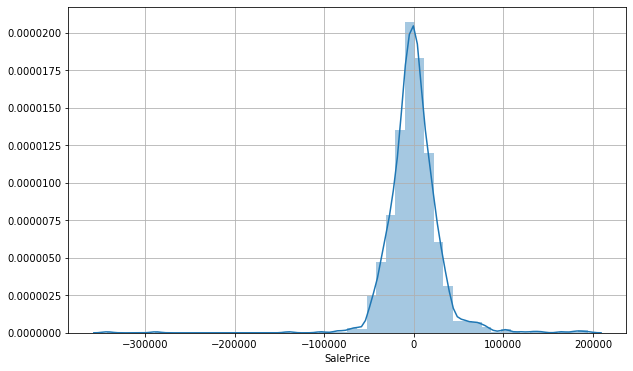

In [32]:
plt.figure(figsize=(10,6))
sns.distplot(error_train)
plt.grid()

# Data is more right skewed

- **Assumption 2 Distribution of error**

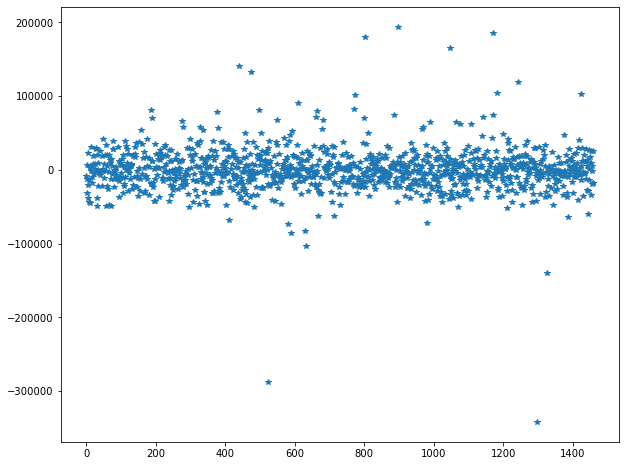

In [33]:
plt.figure(figsize=(10,8))
plt.plot(error_train,"*")

- **Assumption 4 variance around the line**

<Figure size 720x576 with 0 Axes>

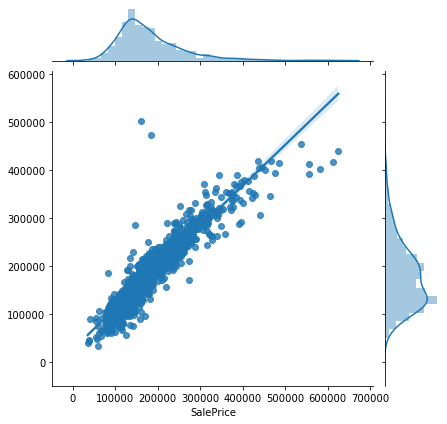

In [34]:
plt.figure(figsize=(10,8))
sns.jointplot( x=y_train ,y=y_pred_train,kind="reg")

## 7. Use the best model on the Test data.

In [35]:
Test = pd.read_csv("test.csv")
Test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [36]:
Test=Test.drop(["Id"],axis=1)

In [37]:
Nulls = pd.DataFrame()
Nulls["Missing_records"] = (Test.isna().sum().sort_values(ascending=False))
Nulls["Missing %"] = ((Test.isna().sum() / Test.shape[0])).sort_values(ascending=False)
Nulls = Nulls[Nulls["Missing_records"]>0]
Nulls.head(25)

,Missing_records,Missing %
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageFinish,78,0.053461
GarageYrBlt,78,0.053461
GarageQual,78,0.053461


In [38]:
# Delete All columns from Test where Missing Test is more than around 20% i.e 260 Missing records
for i in range(0,Nulls.shape[0]):
    if Nulls["Missing_records"][i] > 690 :
        Test.drop([Nulls.index[i]],inplace=True,axis=1)
                
        
# Make 2 different Lists For numeric and categorical Test, which will have only Column names and no Test.
# Few columns are deleted in above step, so those wont be included
numeric_cols = Test.select_dtypes(include=["int64","float"]).columns
cat_cols = Test.select_dtypes(include="object").columns

num_nulls = [] # Numeric columns which have nulls
cat_nulls = [] # Categorical columns which have nulls
for i in Nulls.index:
    if i in numeric_cols:
        num_nulls.append(i)
    elif i in cat_cols:
        cat_nulls.append(i)

# Impute the Test for Numeric Columns

for i in num_nulls:
    #Test.fillna(Test[i].median , inplace=True)
    Test.fillna(Test.median(),inplace=True)
    

# Impute the Test for Categorical columns
for i in cat_nulls:
    Test.fillna(Test[i].mode()[0] , inplace=True)     

In [39]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

Test[Test.select_dtypes(include="object").columns] = Test[Test.select_dtypes(include="object").columns].apply(encoder.fit_transform)

In [40]:
y_predTest = LR.predict(Test)
y_predTest

array([117596.55882184, 170693.4360041 , 178681.83491261, ...,
       159062.54323259, 126194.00922846, 260184.04312955])

In [80]:
Test["Predicted"] = np.round(y_predTest,decimals=3)
Test["Predicted"]

0       117596.559
1       170693.436
2       178681.835
3       198287.194
4       205488.308
           ...    
1454     73570.083
1455     68829.349
1456    159062.543
1457    126194.009
1458    260184.043
Name: Predicted, Length: 1459, dtype: float64

In [64]:
Test["Predicted"].sort_values(ascending=True)

# There 2 Outliers , i,e the 2 negative values

455     -78304.503
1433      -861.894
387      12042.311
1431     13831.236
1118     18779.699
           ...    
803     444007.612
1170    445485.908
834     450067.008
1222    465315.913
1089    612368.132
Name: Predicted, Length: 1459, dtype: float64

In [81]:
Test["Predicted"].describe()

count      1459.000000
mean     189116.338643
std       75115.967333
min      -78304.503000
25%      137263.016000
50%      174566.296000
75%      229160.099500
max      612368.132000
Name: Predicted, dtype: float64

In [76]:
data.SalePrice.describe(percentiles=[.25, .5, .75 , .85 , .90 , .95 , .99])

# Only 5% have price > 326100.000000
# Only 1% have price > 442567.010000

# Maybe therefore the model is having a tough time to predict the HIgher end prices like  755000.000000

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
85%      250000.000000
90%      278000.000000
95%      326100.000000
99%      442567.010000
max      755000.000000
Name: SalePrice, dtype: float64

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


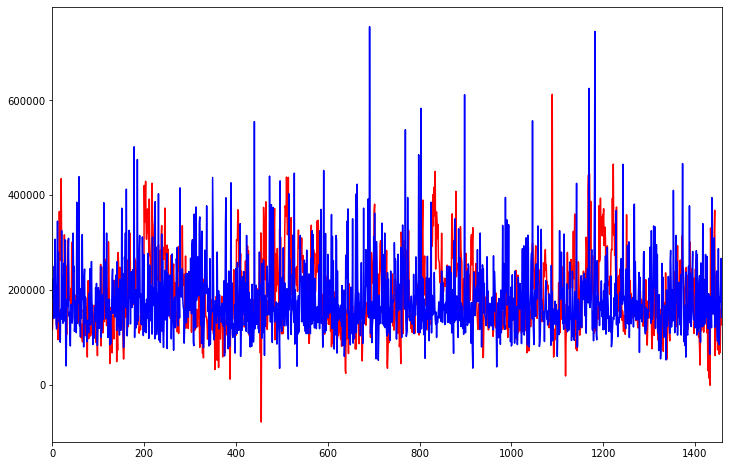

In [82]:
Test["Predicted"].plot(color="r")
data.SalePrice.plot(color="b")